In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn.model_selection import ParameterGrid
import pickle
import sys

In [5]:
def merck_euler(population,dt,b,q,m,n,a,beta):
    
    y1,y2,y3 = population
    
    dy      = np.empty(3)
    
    dy[0] = y1 + dt*(y1*(b*(q**(m+n))-a-beta*y3))
    dy[1] = y2 + dt*(y1*b*(q**m)*(1-(q**n)) + y2*(b*(q**m)-a-beta*y3))
    dy[2] = y3 + dt*((y1+y2)*(b*(1-q**m)) - a*y3)
    
    return(dy)

In [9]:
def simulation(init,b,a,ap,q,qd,m,n,d,tim,ttr):
    
    dt = 1e-4
    initial = [init[0],init[1], init[2]]
    population = initial.copy()
    pop_evol = []
    
    current_q = q
    current_a = a

    for ngen in np.arange(150/dt):
        if ngen % 10 == 0:
            pop_evol.append(population)
        
        population = merck_euler(population,dt,b,current_q,m,n,current_a,d)
        
        # immune system kicks in
        if ngen > tim/dt:
            current_a = ap
            
        # Merck treatment starts
        if ngen > ttr/dt:
            current_q = qd
            
    pop_evol = np.array(pop_evol)
    return(pop_evol)

In [10]:
init = [1,0,0]
b = 7.61
a = 3
ap = 9
q = 1-1e-6
qd = 1-3e-6
m = 20000
n = 87
d = 1e-2
tim = 5
ttr = 5
h = 20

In [8]:
test = simulation(init,b,a,ap,q,qd,m,n,d,h, tim,ttr)

In [12]:
along_d = {}

#for dval in [0,1e-2,5e-3,1e-3, 1e-8][::-1]:
for dval in [0,1e-5,1e-6,1e-7, 1e-8][::-1]:
    test = simulation(init,b,a,ap,q,qd,m,n,dval,tim,ttr)
    along_d[dval] = test

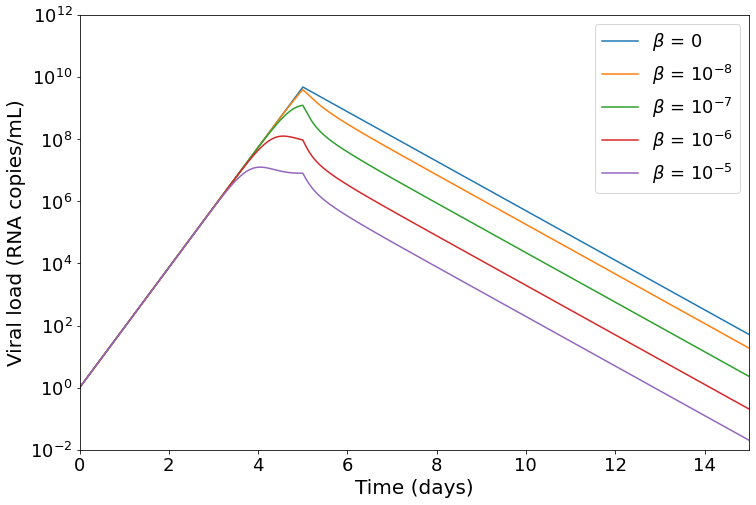

In [14]:
fig, ax = plt.subplots(figsize = (12,8))

ax.plot(np.arange(0,150,1e-3),along_d[0][:,0])
ax.plot(np.arange(0,150,1e-3),along_d[1e-8][:,0])
ax.plot(np.arange(0,150,1e-3),along_d[1e-7][:,0])
ax.plot(np.arange(0,150,1e-3),along_d[1e-6][:,0])
ax.plot(np.arange(0,150,1e-3),along_d[1e-5][:,0])

ax.set_yscale('log')
ax.set_xlim(0,15)
ax.set_ylim(1e-2,1e12)
ax.tick_params(labelsize = 18)

ax.set_xlabel('Time (days)', fontsize = 20)
ax.set_ylabel('Viral load (RNA copies/mL)', fontsize = 20)
ax.legend(['$\\beta$ = 0', '$\\beta$ = $10^{-8}$', '$\\beta$ = $10^{-7}$', '$\\beta$ = $10^{-6}$', '$\\beta$ = $10^{-5}$'], fontsize = 18)
plt.savefig('timeseries_lethaldefection_FEB6.jpg', dpi = 600, bbox_inches = 'tight')
plt.show()

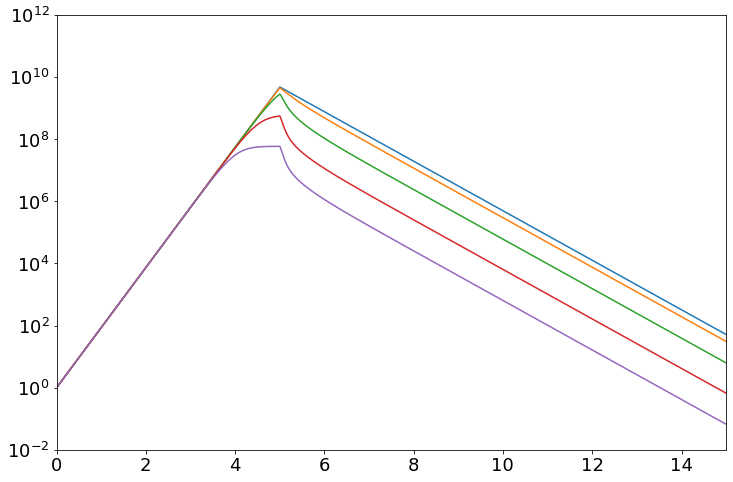

In [8]:
fig, ax = plt.subplots(figsize = (12,8))

ax.plot(np.arange(0,150,1e-3),along_ap[10][0][:,0])
ax.plot(np.arange(0,150,1e-3),along_ap[10][1e-8][:,0])
ax.plot(np.arange(0,150,1e-3),along_ap[10][1e-7][:,0])
ax.plot(np.arange(0,150,1e-3),along_ap[10][1e-6][:,0])
ax.plot(np.arange(0,150,1e-3),along_ap[10][1e-5][:,0])

ax.set_yscale('log')
ax.set_xlim(0,15)
ax.set_ylim(1e-2,1e12)
ax.tick_params(labelsize = 18)
#ax.legend(['$\\beta$ = 0', '$\\beta$ = $10^{-8}$', '$\\beta$ = $10^{-3}$', '$\\beta$ = 5 $\cdot$ $10^{-3}$', '$\\beta$ = $10^{-2}$'], fontsize = 18)
#plt.savefig('timeseries_lethaldefection_JAN26.jpg', dpi = 600, bbox_inches = 'tight')
plt.show()

In [15]:
21**3

9261